# Project description

You're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides.

Working with a database, you'll analyze data from competitors and test a hypothesis about the impact of weather on ride frequency.


## Step 1: Initialization

### 1.1 Write a code to parse the data on weather in Chicago in November 2017 from the website: https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import bokeh
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate

Envoyez une requête HTTP et obtenez le contenu HTML 

Utilisez la bibliothèque 'request' pour envoyer une requête GET à l'URL et obtenir le contenu HTML

In [2]:
# Send an HTTP request to the URL
url = 'https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html'
req = requests.get(url)

In [3]:
soup = BeautifulSoup(req.text, 'lxml')

# Find the table in the HTML
table = soup.find('table', attrs={"id": "weather_records"})

# Parse the table header
headers = [header.text for header in table.find_all('th')]

# Parse the table rows
rows = []
for row in table.find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 0:
        rows.append([cell.text for cell in cells])

# Create a DataFrame
weather_records = pd.DataFrame(rows, columns=headers)

# Print the DataFrame
print(weather_records)

           Date and time Temperature       Description
0    2017-11-01 00:00:00     276.150     broken clouds
1    2017-11-01 01:00:00     275.700  scattered clouds
2    2017-11-01 02:00:00     275.610   overcast clouds
3    2017-11-01 03:00:00     275.350     broken clouds
4    2017-11-01 04:00:00     275.240     broken clouds
..                   ...         ...               ...
692  2017-11-29 20:00:00     281.340        few clouds
693  2017-11-29 21:00:00     281.690      sky is clear
694  2017-11-29 22:00:00     281.070        few clouds
695  2017-11-29 23:00:00     280.060      sky is clear
696  2017-11-30 00:00:00     278.460      sky is clear

[697 rows x 3 columns]


## Step 2: Analyse exploratoire des données dans SQL

### 2.1 Imprimez le champ company_name. Recherchez le nombre de courses en taxi pour chaque compagnie de taxi pour les 15 et 16 novembre 2017, nommez le montant des déplacements sur le terrain résultant et imprimez-le également. Triez les résultats par champ trips_amount par ordre décroissant.

In [4]:
SELECT
    cabs.company_name,
    COUNT(trips.trip_id) AS trips_amount
FROM 
    cabs
    INNER JOIN 
    trips 
    ON 
    trips.cab_id = cabs.cab_id
WHERE 
    CAST(trips.start_ts AS date) BETWEEN '2017-11-15' AND '2017-11-16'
GROUP BY 
    company_name
ORDER BY 
    trips_amount DESC;

IndentationError: unexpected indent (1833501797.py, line 2)

### 2.2 Recherchez le nombre de courses pour chaque compagnie de taxi dont le nom contient les mots « Jaune » ou « Bleu » pour la période du 1er au 7 novembre 2017. Nommez la variable résultante trips_amount. Regroupez les résultats par champ company_name.

In [ ]:
SELECT
    cabs.company_name as company_name,
    COUNT(trips.trip_id) AS trips_amount
FROM 
    cabs
INNER JOIN 
    trips 
ON 
    trips.cab_id = cabs.cab_id
WHERE 
    CAST(trips.start_ts AS date) BETWEEN '2017-11-01' AND '2017-11-07'
    AND cabs.company_name LIKE '%%Yellow%%'
GROUP BY company_name
UNION ALL
SELECT
    cabs.company_name as company_name,
    COUNT(trips.trip_id) AS trips_amount
FROM 
    cabs
INNER JOIN 
    trips 
ON 
    trips.cab_id = cabs.cab_id
WHERE 
    CAST(trips.start_ts AS date) BETWEEN '2017-11-01' AND '2017-11-07'
    AND cabs.company_name LIKE '%%Blue%%'
GROUP BY company_name;

### 2.3 Du 1er au 7 novembre 2017, les compagnies de taxi les plus populaires étaient Flash Cab et Taxi Affiliation Services. Recherchez le nombre de trajets pour ces deux entreprises et nommez la variable résultante trips_amount. Rejoignez les manèges de toutes les autres entreprises du groupe «Autre». Regroupez les données par nom de compagnie de taxi. Nommez le champ avec les noms des compagnies de taxi company. Triez le résultat par ordre décroissant par trips_amount.

In [ ]:
SELECT
    CASE 
        WHEN company_name = 'Flash Cab' THEN 'Flash Cab' 
        WHEN company_name = 'Taxi Affiliation Services' THEN 'Taxi Affiliation Services' 
        ELSE 'Other' 
    END AS company,
    COUNT(trips.trip_id) as trips_amount                
FROM 
    cabs
INNER JOIN 
    trips 
ON 
    trips.cab_id = cabs.cab_id
WHERE 
    CAST(trips.start_ts AS date) BETWEEN '2017-11-01' AND '2017-11-07'
GROUP BY 
    company
ORDER BY 
    trips_amount DESC;

## Step 3: Testez l'hypothèse dans SQL

Testez l'hypothèse selon laquelle la durée des trajets entre le Loop et l'aéroport international O'Hare change les samedis pluvieux.

### 3.1 Récupérez les identifiants des quartiers O'Hare et Loop dans la table des quartiers.

In [ ]:
SELECT
    neighborhood_id,
    name
FROM 
    neighborhoods
WHERE 
    name LIKE '%Hare' OR name LIKE 'Loop'

### 3.2 Pour chaque heure, récupérez les enregistrements de conditions météorologiques de la table Weather_records. À l'aide de l'opérateur CASE, divisez toutes les heures en deux groupes : « Mauvais » si le champ de description contient les mots « pluie » ou « tempête » et « Bon » pour les autres. Nommez le champ résultant Weather_conditions. Le tableau final doit comprendre deux champs : date et heure (ts) et Weather_conditions.

In [ ]:
SELECT
    ts,
    CASE
        WHEN description LIKE '%rain%' OR description LIKE '%storm%' THEN 'Bad'
        ELSE 'Good'
    END AS weather_conditions
FROM 
    weather_records;

### 3.3 Récupérez dans la table des trajets tous les trajets qui ont commencé dans la boucle (neighborhood_id : 50) et se sont terminés à O'Hare (neighborhood_id : 63) un samedi. Obtenez les conditions météorologiques pour chaque trajet. Utilisez la méthode que vous avez appliquée dans la tâche précédente. Récupérez également la durée de chaque trajet. Ignorez les trajets pour lesquels les données sur les conditions météorologiques ne sont pas disponibles.

In [ ]:
SELECT
    start_ts,
    T.weather_conditions,
    duration_seconds
FROM 
    trips
INNER JOIN (
    SELECT
        ts,
        CASE
            WHEN description LIKE '%rain%' OR description LIKE '%storm%' THEN 'Bad'
            ELSE 'Good'
        END AS weather_conditions
    FROM 
        weather_records          
) T on T.ts = trips.start_ts
WHERE 
    pickup_location_id = 50 AND dropoff_location_id = 63 AND EXTRACT (DOW from trips.start_ts) = 6
ORDER BY trip_id

## Step 4: Analyse exploratoire des données dans Python

En plus des données que vous avez récupérées lors des tâches précédentes, vous disposez d'un deuxième fichier. Vous avez maintenant ces deux CSV :

     •	/datasets/project_sql_result_01.csv. It contains the following data:
          o	company_name: taxi company name
          o	trips_amount: the number of rides for each taxi company on November 15-16, 2017.

     •	/datasets/project_sql_result_04.csv. It contains the following data:
          o	dropoff_location_name: Chicago neighborhoods where rides ended
          o	average_trips: the average number of rides that ended in each neighborhood in November 2017.


### 4.1 Importer les fichiers

In [6]:
#Set up individual data frames based on data provided by Triple Ten
df_trips = pd.read_csv(r'C:/Users/nicho/OneDrive/Documents/GitHub/tripleten/Project 6/moved_project_sql_result_01.csv')
df_ohare_loop = pd.read_csv(r'C:/Users/nicho/OneDrive/Documents/GitHub/tripleten/Project 6/moved_project_sql_result_04.csv')
df_dropoff = pd.read_csv(r'C:/Users/nicho/OneDrive/Documents/GitHub/tripleten/Project 6/moved_project_sql_result_07.csv')

### 4.2 Étudier les données qu’ils contiennent

In [ ]:
#Verify the structure of the data in the quickest way
df_trips.info()
df_dropoff.info()
df_ohare_loop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1062 entries, 0 to 1067
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1062 non-null   datetime64[ns]
 1   weather_conditions  1062 non-null   object        
 2   duration_seconds    1062 non-null   float64       
 3   date                1062 non-null   datetime64[ns]
 4   time                1062 non-null   object        
 5   day                 1062 non-null   int32         
dtypes: datetime64[ns](2), float64(1), int32(1), object(2)
memory usage: 53.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [ ]:
# Rename the 'average_trips' column to 'number_of_trips
df_ohare_loop = df_ohare_loop.rename(columns={'average_trips': 'number_of_trips'})

In [ ]:
#Quality assurance (QA) check to identify any irregularities in the datasets

def check_values(df):
    print(f"Checking {df.shape[0]} rows and {df.shape[1]} columns in DataFrame...")
    
    # count zeros
    zero_count = (df == 0).sum().sum()
    print(f"Zeros found: {zero_count}")
    
    # count null/nan and inf/-inf
    df_inf = df.replace([np.inf, -np.inf], np.nan)
    nan_count = df_inf.isnull().sum().sum()
    print(f"Null/NaN values found: {nan_count}")

check_values(df_trips)
check_values(df_dropoff)
check_values(df_ohare_loop)

Checking 64 rows and 2 columns in DataFrame...
Zeros found: 0
Null/NaN values found: 0
Checking 1068 rows and 3 columns in DataFrame...
Zeros found: 6
Null/NaN values found: 0
Checking 94 rows and 2 columns in DataFrame...
Zeros found: 0
Null/NaN values found: 0


In [ ]:
#Drop rows where zeros were found to avoid any downstream processing issues
df_dropoff = df_dropoff[(df_dropoff != 0).all(axis=1)]

In [ ]:
# Split the 'start_ts' column into 'date' and 'time' columns
df_dropoff[['date', 'time']] = df_dropoff['start_ts'].str.split(' ', expand=True)

# Now you have your DataFrame with separate 'date' and 'time' columns
print(df_dropoff.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1062 entries, 0 to 1067
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1062 non-null   object 
 1   weather_conditions  1062 non-null   object 
 2   duration_seconds    1062 non-null   float64
 3   date                1062 non-null   object 
 4   time                1062 non-null   object 
dtypes: float64(1), object(4)
memory usage: 49.8+ KB
None


### 4.3 Assurez-vous que les types de données sont corrects

In [ ]:
# Convert the 'start_ts' column to datetime format
df_dropoff['start_ts'] = pd.to_datetime(df_dropoff['start_ts'])

# Extract the day from the 'start_ts' column
df_dropoff['day'] = df_dropoff['start_ts'].dt.day

print(df_dropoff.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1062 entries, 0 to 1067
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1062 non-null   datetime64[ns]
 1   weather_conditions  1062 non-null   object        
 2   duration_seconds    1062 non-null   float64       
 3   date                1062 non-null   object        
 4   time                1062 non-null   object        
 5   day                 1062 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 53.9+ KB
None


In [ ]:
# Convert the 'date' column to datetime format
df_dropoff['date'] = pd.to_datetime(df_dropoff['date'])

df_dropoff.dtypes

start_ts              datetime64[ns]
weather_conditions            object
duration_seconds             float64
date                  datetime64[ns]
time                          object
day                            int32
dtype: object

In [ ]:
# assume df_trips is your dataframe and 'company_name' is the column with the unwanted characters

df_trips['company_name'] = df_trips['company_name'].str.replace(r'\d{4} - \d{5}', '', regex=True)

### 4.4 Identifiez les 10 premiers quartiers en termes de décrochages

In [ ]:
# Assuming df_ohare_loop is your DataFrame
df_ohare_loop = df_ohare_loop.sort_values(by='number_of_trips', ascending=False)

# Now df_ohare_loop is sorted by the 'average_trips' column in descending order
print("The most popular destinations of taxi rides in Chicago in November 2017 were:")
display(df_ohare_loop.head(10))

The most popular destinations of taxi rides in Chicago in November 2017 were:


,dropoff_location_name,number_of_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


### 4.5 Faites des graphiques : compagnies de taxi et nombre de trajets, top 10 des quartiers par nombre de déposes

C:\Users\nicho\AppData\Local\Temp\ipykernel_19716\4077518566.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='trips_amount', y='company_name', data=df_trips_sorted, palette="Dark2")


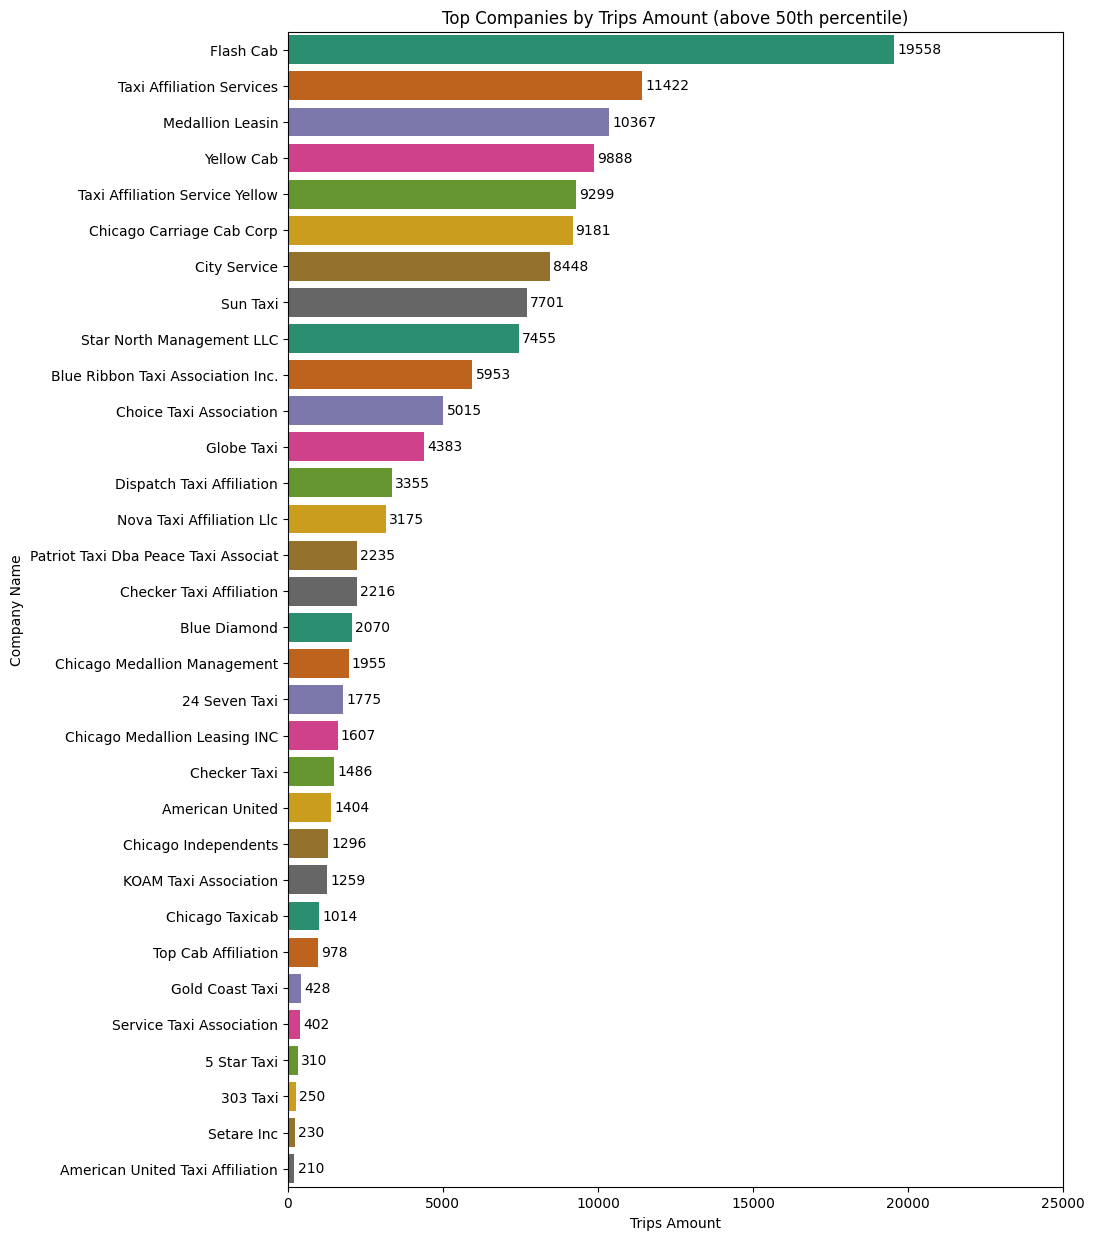

In [ ]:
# Compagnies de taxi première visualisation (Horizontal Bar Chart using ['company_name'] and sum of ['trips_amount'] )

# Calculate the 50th percentile of trips_amount
trips_amount_50th_percentile = np.percentile(df_trips['trips_amount'], 50)

# Filter the dataframe to only include companies with trips_amount above the 50th percentile
df_trips_filtered = df_trips[df_trips['trips_amount'] > trips_amount_50th_percentile]

# Sort the dataframe by 'trips_amount' in descending order
df_trips_sorted = df_trips_filtered.groupby('company_name')['trips_amount'].sum().reset_index().sort_values('trips_amount', ascending=False)

# Create the horizontal bar chart using seaborn
plt.figure(figsize=(10, 15))  # Elongate the frame
sns.barplot(x='trips_amount', y='company_name', data=df_trips_sorted, palette="Dark2")
plt.xlabel('Trips Amount')
plt.ylabel('Company Name')
plt.title('Top Companies by Trips Amount (above 50th percentile)')

# Set the x-axis limit to 25000
plt.xlim(0, 25000)

# Add data labels
for i, (company, trips) in enumerate(zip(df_trips_sorted['company_name'], df_trips_sorted['trips_amount'])):
    plt.text(trips + 100, i, f'{trips:.0f}', ha='left', va='center')

plt.show()

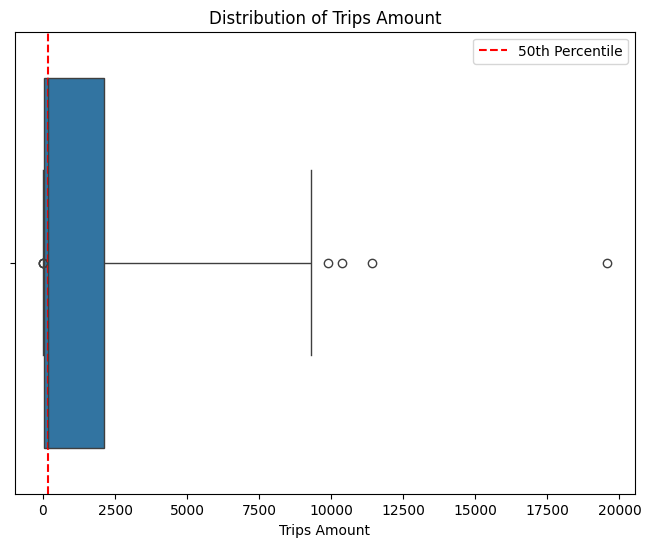

In [ ]:
# Create a boxplot of the full dataset
plt.figure(figsize=(8, 6))
sns.boxplot(x='trips_amount', data=df_trips, whis=[5, 95])
plt.title('Distribution of Trips Amount')
plt.xlabel('Trips Amount')
plt.ylabel('')

# Add a horizontal line at the 50th percentile
trips_amount_50th_percentile = np.percentile(df_trips['trips_amount'], 50)
plt.axvline(trips_amount_50th_percentile, color='r', linestyle='--', label='50th Percentile')

plt.legend()
plt.show()

In [ ]:
print(tabulate.tabulate([df_trips['trips_amount'].describe().values], 
                         headers=df_trips['trips_amount'].describe().index, 
                         tablefmt='psql'))

+---------+---------+---------+-------+-------+-------+--------+-------+
|   count |    mean |     std |   min |   25% |   50% |    75% |   max |
|---------+---------+---------+-------+-------+-------+--------+-------|
|      64 | 2145.48 | 3812.31 |     2 | 20.75 | 178.5 | 2106.5 | 19558 |
+---------+---------+---------+-------+-------+-------+--------+-------+


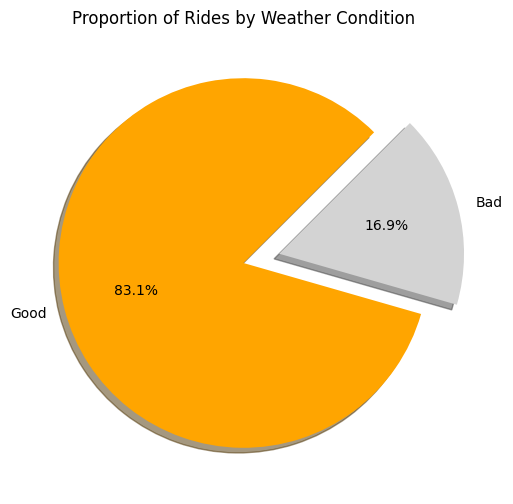

In [ ]:
# Nombre de trajets première visualisation (Pie Chart of proportion of rides by weather_condtion through a count of ['weather_conditions'])
# Assuming your dataframe is named df_trips

# Count the number of rides by weather condition
weather_counts = df_dropoff['weather_conditions'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', colors=['orange', 'lightgrey'], explode=[0., 0.2], shadow = True, startangle=45)
plt.title('Proportion of Rides by Weather Condition')
plt.show()

C:\Users\nicho\AppData\Local\Temp\ipykernel_19716\388933904.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='good_count', data=good_counts, palette="deep", ax=ax1)
C:\Users\nicho\AppData\Local\Temp\ipykernel_19716\388933904.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='bad_count', data=bad_counts, palette="rocket", ax=ax2)


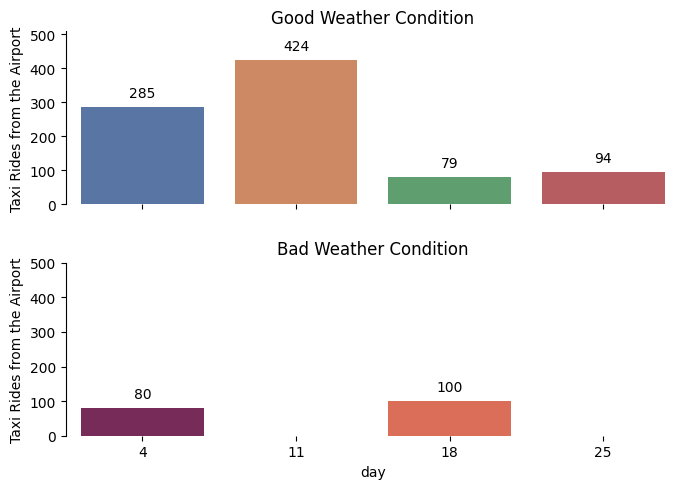

In [ ]:
# Nombre de trajets visualisation deux (Histogram of rides with a count of ['duration_seconds'] by buckets of durations)
# Filter good and bad data
good_data = df_dropoff[df_dropoff['weather_conditions'] == 'Good']
bad_data = df_dropoff[df_dropoff['weather_conditions'] == 'Bad']

# Create a count of rides for each day
good_counts = good_data.groupby('day').size().reset_index(name='good_count')
bad_counts = bad_data.groupby('day').size().reset_index(name='bad_count')

# Merge the two datasets on the 'day' column
counts = good_counts.merge(bad_counts, on='day')

# Create a figure with two subplots
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5), sharex=True)

# Extend the y-axis on the good data plot
ax1.set_ylim(0, max(good_counts['good_count']) * 1.2)

# Plot good data
sns.barplot(x='day', y='good_count', data=good_counts, palette="deep", ax=ax1)
ax1.set_ylabel('Taxi Rides from the Airport')
ax1.set_title('Good Weather Condition')

# Add data labels to the good data plot
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Plot bad data
sns.barplot(x='day', y='bad_count', data=bad_counts, palette="rocket", ax=ax2)
ax2.set_ylabel('Taxi Rides from the Airport')
ax2.set_title('Bad Weather Condition')

# Add data labels to the bad data plot
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Extend the y-axis on the bad data plot
ax2.set_ylim(0, max(bad_counts['bad_count']) * 5.0)

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
plt.show()

In [10]:
pip install bokeh pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: C:\Users\nicho\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [11]:
from bokeh.models import ColumnDataSource, Whisker
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap, jitter

# Assuming your dataframe is named df_dropoff

classes = list(sorted(df_dropoff["weather_conditions"].unique()))

p = figure(height=400, x_range=classes, background_fill_color="#efefef",
           title="Weather Condition vs Trip Duration with quantile ranges")
p.xgrid.grid_line_color = None

g = df_dropoff.groupby("weather_conditions")
upper = g.duration_seconds.quantile(0.80)
lower = g.duration_seconds.quantile(0.20)
source = ColumnDataSource(data=dict(base=classes, upper=upper, lower=lower))

error = Whisker(base="base", upper="upper", lower="lower", source=source,
                level="annotation", line_width=2)
error.upper_head.size=20
error.lower_head.size=20
p.add_layout(error)

p.scatter(jitter("weather_conditions", 0.3, range=p.x_range), "duration_seconds", source=df_dropoff,
          alpha=0.5, size=13, line_color="white",
          color=factor_cmap("weather_conditions", "Light7", classes))

show(p)

In [ ]:
# Top 10 quartiers par nombre de desposes première visualisation 
# Sort the DataFrame by 'average_trips' in descending order

# Convert 'average_trips' to integer (assuming it's a float)
top_10_df = df_ohare_loop.copy()  # Create a copy (optional)
top_10_df['number_of_trips'] = top_10_df['number_of_trips'].astype(int)

# Get the top 10 rows (neighborhoods)
top_10_df = top_10_df.sort_values(by='number_of_trips', ascending=False).head(10)

display(top_10_df)


,dropoff_location_name,number_of_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


In [ ]:
# Compagnies de taxi visualisation deux (Bokeh scatter with markers = ['weather_conditions'], x = ['duration_seconds'], y = ['time'])
#https://docs.bokeh.org/en/latest/docs/examples/basic/data/transform_markers.html

from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap, factor_mark

# Create legend groups, markers, and color mapping based on unique weather conditions
SPECIES = df_dropoff['weather_conditions'].unique()  # Get unique weather conditions
MARKERS = ['hex', 'circle_x'] * (len(SPECIES) // 2 + 1)  # Assign markers cyclically

# Use your data source (assuming it's a pandas DataFrame)
source = df_dropoff

p = figure(title="Weather Conditions", background_fill_color="#fafafa")
p.xaxis.axis_label = 'Duration (seconds)'
p.yaxis.axis_label = 'Start Time'

p.scatter(x="duration_seconds", y="time", source=source,
          legend_group="weather_conditions", fill_alpha=0.4, size=12,
          marker=factor_mark('weather_conditions', MARKERS, SPECIES),
          color=factor_cmap('weather_conditions', 'Category10_3', SPECIES))

p.legend.location = "top_left"
p.legend.title = "Weather Conditions"

show(p)

### 4.6 Tirer des conclusions sur la base de chaque graphique et expliquer les résultats

## Step 5: Testez l'hypothèse dans Python

     •	/datasets/project_sql_result_07.csv — le résultat de la dernière requête. Il contient des données sur les trajets du Loop à l'aéroport international O'Hare. N'oubliez pas que voici les valeurs des champs de la table :

          o	start_ts
          o	pickup date and time
          o	weather_conditions
          o	weather conditions at the moment the ride started
          o	duration_seconds
          o	ride duration in seconds


### 5.1 Testez l'hypothèse :

#### Nulle: La durée moyenne des trajets depuis le Loop jusqu'à l'aéroport international O'Hare change les samedis pluvieux.

#### Alternative: La durée moyenne des trajets depuis le Loop jusqu'à l'aéroport international O'Hare ne change les samedis pluvieux.

#### Et le test d'hypotheses que nous devrions utiliser est: test t de proportion pour un enchantillon

In [ ]:
from scipy.stats import ttest_ind

# Add day of the week column
df_dropoff['day_of_week'] = df_dropoff['date'].dt.dayofweek

# Create a binary column indicating whether it's a Saturday
df_dropoff['is_saturday'] = df_dropoff['day_of_week'] == 5

# Create a binary column indicating whether the weather is 'Bad' (1) or 'Good' (0)
df_dropoff['bad_weather'] = np.where(df_dropoff['weather_conditions'] == 'Bad', 1, 0)

# Split the data into rainy Saturdays and other days
rainy_saturdays = df_dropoff[(df_dropoff['is_saturday'] == True) & (df_dropoff['bad_weather'] == 1)]['duration_seconds']
other_days = df_dropoff[(df_dropoff['is_saturday'] != True) | (df_dropoff['bad_weather'] == 0)]['duration_seconds']

print(rainy_saturdays.shape, other_days.shape)

(180,) (882,)


In [ ]:
# Perform two-sample t-test
t_stat, p_val = ttest_ind(rainy_saturdays, other_days)

print(f"t-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

# Interpret results
if p_val < 0.05:
    print("Reject null hypothesis: The mean duration of trips on rainy Saturdays is significantly different from other days.")
else:
    print("Fail to reject null hypothesis: The mean duration of trips on rainy Saturdays is not significantly different from other days.")

t-statistic: 6.84, p-value: 0.0000
Reject null hypothesis: The mean duration of trips on rainy Saturdays is significantly different from other days.


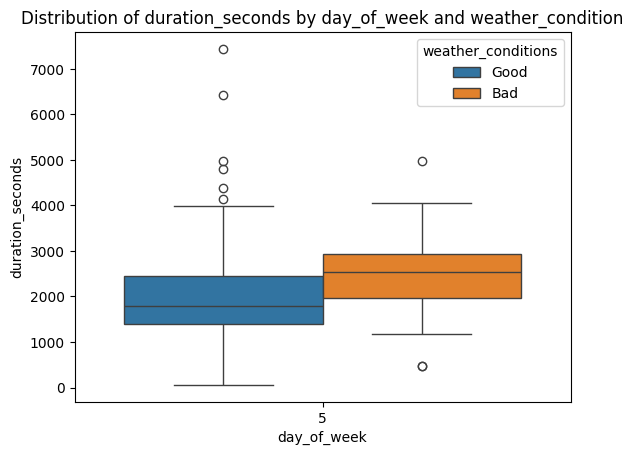

In [ ]:
sns.boxplot(x="day_of_week", y="duration_seconds", hue="weather_conditions", data=df_dropoff)
plt.title("Distribution of duration_seconds by day_of_week and weather_condition")
plt.show()

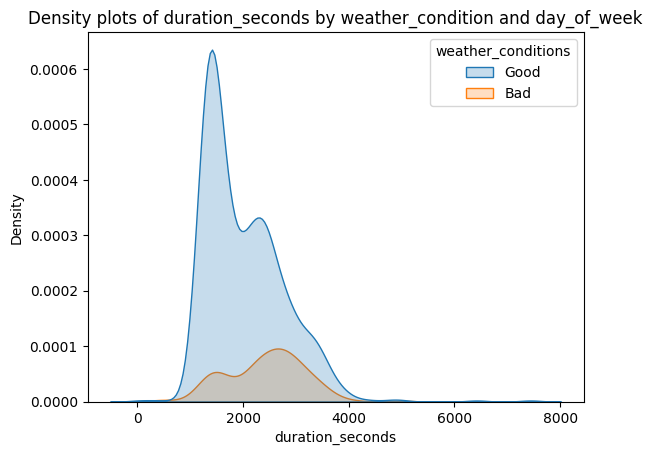

In [ ]:
sns.kdeplot(x="duration_seconds", hue="weather_conditions", data=df_dropoff, fill=True)
plt.title("Density plots of duration_seconds by weather_condition and day_of_week")
plt.show()

In [ ]:
from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U test
u_stat, p_val = mannwhitneyu(rainy_saturdays, other_days)

# Format the output
print(f"Mann-Whitney U statistic: {u_stat:.2f}")
print(f"p-value: {p_val:.4f}")

Mann-Whitney U statistic: 107113.50
p-value: 0.0000


#### 5.1.1 Comment vous avez formé les hypothèses nulles et alternatives?

#### 5.1.2 Quel critère avez-vous utilisé pour tester les hypothèses et pourquoi?

#### 5.1.3 Comment mon projet sera-t-il évalué ?

## Step 6: Conclusion générale

https://drive.google.com/file/d/1VY8-YFiq4x1DQJKqAoXdWsVK4qfbH6YE/view?usp=sharing
#Add GitHub Address